In [1]:
from google.colab import files

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from scipy import sparse
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar archivos
X_tfidf = sparse.load_npz('/content/drive/MyDrive/Proyecto Integrador/matriz_tfidf.npz')
vectorizer = joblib.load('/content/drive/MyDrive/Proyecto Integrador/vectorizer_matriz_tfidf.pkl')
df_features = pd.read_csv('/content/drive/MyDrive/Proyecto Integrador/df_avance_2.csv')

In [4]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3213989 stored elements and shape (230, 224227)>

In [5]:
vectorizer

TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 3))

In [6]:
df_features

,date,text,tokens,Tipos de interés,Cambio tasa de interés,lemmatized_tokens,entities,text_length,num_tokens,avg_token_length,ent_org,ent_person,ent_gpe,year,month,quarter,dow,rate_dir,rate_positive,interest_bin_q
0,1991-03-26,This is the first time in a long time that [th...,"['first', 'time', 'long', 'time', 'committee',...",5.75,NaN,"[ 'first ' , 'time ' , 'long ' , 'time ' , 'co...","[('first', 'ORDINAL'), ('Committee', 'ORG'), (...",135658,11115,12.203850,134,197,72,1991,3,1,1,0,0,"(5.0, 6.5]"
1,1991-05-14,Are there any comments raised by the report on...,"['comments', 'raised', 'report', 'examination'...",5.50,-0.25,"[ 'comments ' , 'raised ' , 'report ' , 'exami...","[('the System Open Market Account', 'EVENT'), ...",82695,6821,12.121812,33,98,28,1991,5,2,1,-1,0,"(5.0, 6.5]"
2,1991-07-03,[Statement--see Appendix.] Questions for Sam? ...,"['statement', 'see', 'appendix', 'questions', ...",5.50,0.00,"[ 'statement ' , 'see ' , 'appendix ' , 'quest...","[('Appendix', 'PERSON'), ('Sam', 'PERSON'), ('...",157471,12690,12.408084,95,265,63,1991,7,3,2,0,0,"(5.0, 6.5]"
3,1991-08-20,"Good morning, everyone. Would somebody like to...","['good', 'morning', 'everyone', 'would', 'some...",5.25,-0.25,"[ 'good ' , 'morning ' , 'everyone ' , 'would ...","[('the minutes of the', 'TIME'), ('July 2', 'D...",127644,10417,12.252256,85,232,49,1991,8,3,1,-1,0,"(5.0, 6.5]"
4,1991-10-01,"Good morning, everyone. We have Tom Hoenig wit...","['good', 'morning', 'everyone', 'tom', 'hoenig...",5.00,-0.25,"[ 'good ' , 'morning ' , 'everyone ' , 'tom ' ...","[('Tom Hoenig', 'PERSON'), ('Tom', 'PERSON'), ...",94743,7789,12.162131,69,135,43,1991,10,4,1,-1,0,"(2.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2019-05-01,"Good morning, everyone. PARTICIPANTS. Good mor...","['good', 'morning', 'everyone', 'participants'...",2.00,0.00,"[ 'good ' , 'morning ' , 'everyone ' , 'partic...","[('FOMC', 'ORG'), ('Board', 'ORG'), ('Chris Er...",385239,33809,11.394232,687,340,179,2019,5,2,2,0,0,"(0.5, 2.0]"
226,2019-06-19,"Good morning, everyone. Let’s get started. Thi...","['good', 'morning', 'everyone', 'let', 'get', ...",2.00,0.00,"[ 'good ' , 'morning ' , 'everyone ' , 'let ' ...","[('FOMC', 'ORG'), ('Board', 'ORG'), ('first', ...",351434,30643,11.468281,408,309,184,2019,6,2,2,0,0,"(0.5, 2.0]"
227,2019-07-31,"Good morning, everyone. PARTICIPANTS. Good mor...","['good', 'morning', 'everyone', 'participants'...",2.00,0.00,"[ 'good ' , 'morning ' , 'everyone ' , 'partic...","[('FOMC', 'ORG'), ('Board', 'ORG'), ('first', ...",483336,41706,11.588846,623,367,261,2019,7,3,2,0,0,"(0.5, 2.0]"
228,2019-09-18,"Okay. Good morning, everyone. This meeting, as...","['okay', 'good', 'morning', 'everyone', 'meeti...",1.75,-0.25,"[ 'okay ' , 'good ' , 'morning ' , 'everyone '...","[('FOMC', 'ORG'), ('Board', 'ORG'), ('today', ...",420791,36464,11.539586,531,375,257,2019,9,3,2,-1,0,"(0.5, 2.0]"


In [7]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    230 non-null    object 
 1   text                    230 non-null    object 
 2   tokens                  230 non-null    object 
 3   Tipos de interés        230 non-null    float64
 4   Cambio tasa de interés  229 non-null    float64
 5   lemmatized_tokens       230 non-null    object 
 6   entities                230 non-null    object 
 7   text_length             230 non-null    int64  
 8   num_tokens              230 non-null    int64  
 9   avg_token_length        230 non-null    float64
 10  ent_org                 230 non-null    int64  
 11  ent_person              230 non-null    int64  
 12  ent_gpe                 230 non-null    int64  
 13  year                    230 non-null    int64  
 14  month                   230 non-null    in

In [8]:
# num_cols = ["num_tokens", "ent_org", "ent_person", "ent_gpe", "month", "quarter", "dow"] 0.97 0.67
# num_cols = ["num_tokens", "ent_org", "ent_person", "ent_gpe", "month", "quarter"] 0.98 0.71
# num_cols = ["num_tokens", "ent_org", "ent_person", "ent_gpe", "quarter"] 0.96 0.71 saga 0.79 0.67 without class balance

In [9]:
num_cols = ["num_tokens", "ent_org", "ent_person", "ent_gpe", "quarter"]

In [10]:
X_num = df_features[num_cols].fillna(0).values

In [11]:
# Escalar numéricas (importante para regresión)
scaler = StandardScaler(with_mean=False)
X_num_scaled = scaler.fit_transform(X_num)

In [12]:
# Combinar TF-IDF + numéricas
X = hstack([X_tfidf, X_num_scaled], format="csr")

In [13]:
# Definir target
y = df_features["rate_dir"].values

### **1. Selección del Algoritmo Baseline: Regresión Logística**

Para establecer un modelo de referencia (baseline) en este problema de clasificación multiclase (predecir si la tasa de interés sube `1`, baja `-1` o se mantiene `0`), se ha seleccionado el algoritmo de **Regresión Logística**. La elección se fundamenta en los siguientes puntos clave, alineados con las mejores prácticas para la creación de un baseline:

* **Interpretabilidad:** Al ser un modelo lineal, la Regresión Logística es altamente interpretable. Los coeficientes asignados a cada característica nos permiten entender qué palabras (del TF-IDF) y qué variables numéricas tienen un mayor impacto en la probabilidad de que la tasa suba o baje. Esto es fundamental para un primer análisis y para cumplir con el criterio de "Características importantes".
* **Eficiencia:** Es un algoritmo computacionalmente eficiente, rápido de entrenar incluso con un gran número de características (más de 224,000 en nuestro caso, provenientes de la matriz TF-IDF). Esto permite una iteración y evaluación ágil.
* **Rendimiento Sólido como Baseline:** La Regresión Logística es un estándar en problemas de clasificación de texto y a menudo ofrece un rendimiento sorprendentemente bueno que sirve como un excelente punto de comparación para modelos más complejos (como redes neuronales o ensambles de árboles).
* **Manejo de Datos Mixtos:** Funciona eficazmente con la combinación de datos dispersos (la matriz TF-IDF del texto) y datos densos (las características numéricas que hemos diseñado), que es exactamente la estructura de nuestros datos de entrada.

Se utilizará la implementación de `sklearn` con el solver `"saga"`, que es eficiente para datasets grandes y permite regularización L2 para prevenir el sobreajuste. Además, se usará el parámetro `class_weight="balanced"` para que el modelo preste la debida atención a las clases minoritarias (subidas y bajadas de tasas), que son menos frecuentes pero de gran importancia para el negocio.

In [14]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
# Modelo baseline: regresión logística
clf = LogisticRegression(
    solver="saga",
    penalty="l2",
    C=1,
    max_iter=2000,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42
)

In [16]:
clf.fit(X_train, y_train)
print("Train acc:", clf.score(X_train, y_train))
print("Test acc:", clf.score(X_test, y_test))

Train acc: 0.967391304347826
Test acc: 0.717391304347826


### **3. Análisis de Sub/Sobreajuste**

Al comparar el desempeño del modelo en los conjuntos de datos, se observa:
* **Accuracy de Entrenamiento:** `0.967`
* **Accuracy de Prueba:** `0.717`

La gran diferencia entre estas dos métricas (~25 puntos porcentuales) es un indicador claro de **sobreajuste (overfitting)**. Esto significa que el modelo ha "memorizado" muy bien los datos de entrenamiento, pero no generaliza correctamente a datos nuevos (el conjunto de prueba). Aunque es común en un primer modelo con tantas características, es un punto clave a mejorar en futuras iteraciones (por ejemplo, con una regularización más fuerte o reducción de dimensionalidad).

Para visualizar este comportamiento, se generarán **curvas de aprendizaje**.

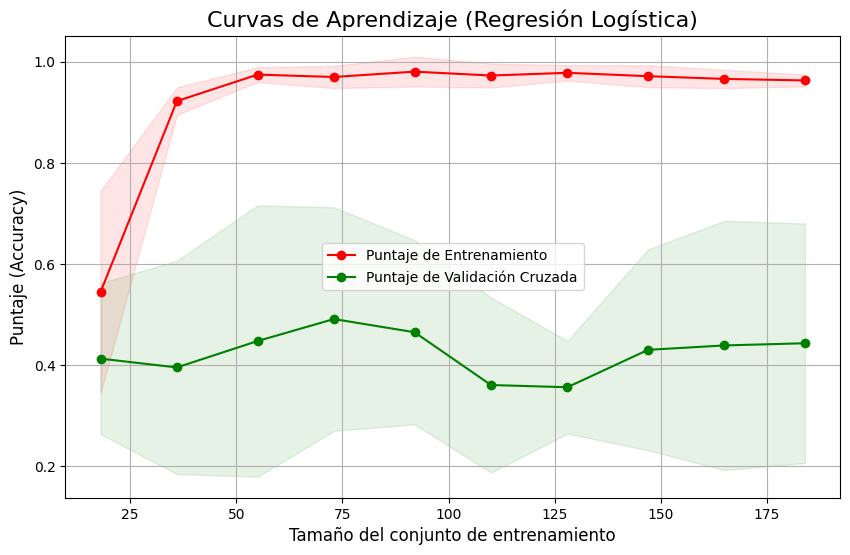

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntaje de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntaje de Validación Cruzada")

plt.title("Curvas de Aprendizaje (Regresión Logística)", fontsize=16)
plt.xlabel("Tamaño del conjunto de entrenamiento", fontsize=12)
plt.ylabel("Puntaje (Accuracy)", fontsize=12)
plt.legend(loc="best")
plt.grid()
plt.show()

In [18]:
# Predicciones
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

In [19]:
# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.717391304347826
Log Loss: 0.8107350685822233

Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.86      0.67         7
           0       0.82      0.74      0.78        31
           1       0.57      0.50      0.53         8

    accuracy                           0.72        46
   macro avg       0.65      0.70      0.66        46
weighted avg       0.74      0.72      0.72        46



### **4. Métrica Adecuada para el Problema de Negocio**

Si bien se han calculado varias métricas, la métrica principal seleccionada para evaluar el éxito del modelo es el **F1-Score Ponderado (Weighted F1-Score)**.

El problema de negocio consiste en predecir la dirección del cambio en las tasas de interés, un problema de clasificación con clases inherentemente desbalanceadas: la decisión de "mantener" la tasa (clase `0`) es mucho más frecuente que "subir" (`1`) o "bajar" (`-1`).

* **Insuficiencia del Accuracy:** En este escenario, el *accuracy* (precisión global) es una métrica engañosa. Un modelo simple que siempre prediga la clase mayoritaria ("mantener") obtendría un *accuracy* alto, pero fallaría en el objetivo principal del negocio, que es anticipar los cambios.
* **Ventaja del F1-Score:** El F1-Score es la media armónica de la **precisión** y el **recall**. Es robusto ante el desbalance de clases.
* **¿Por qué ponderado (Weighted)?** Se elige la versión "ponderada" porque da más importancia a la clase con más instancias. Para un baseline, esto refleja un objetivo de negocio conservador: tener un buen rendimiento general.

Por lo tanto, el **F1-Score Ponderado de `0.72`** en el conjunto de prueba es nuestra métrica de evaluación principal.

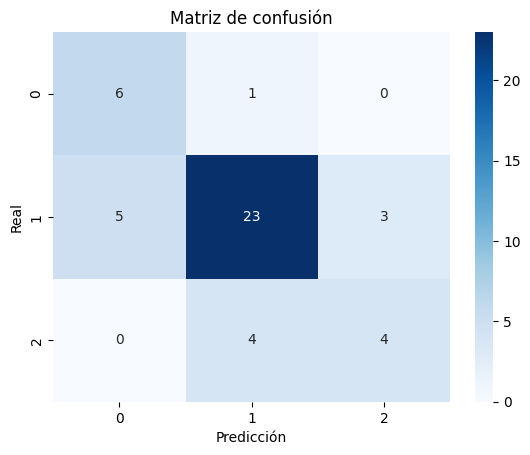

In [20]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

dummy_mf = DummyClassifier(strategy="most_frequent")
dummy_mf.fit(X_train, y_train)
y_pred_dummy_mf = dummy_mf.predict(X_test)
f1_dummy_mf = f1_score(y_test, y_pred_dummy_mf, average='weighted')

dummy_strat = DummyClassifier(strategy="stratified", random_state=42)
dummy_strat.fit(X_train, y_train)
y_pred_dummy_strat = dummy_strat.predict(X_test)
f1_dummy_strat = f1_score(y_test, y_pred_dummy_strat, average='weighted')

print(f"F1-Score Ponderado (Regresión Logística): {f1_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score Ponderado (Dummy 'most_frequent'): {f1_dummy_mf:.2f}")
print(f"F1-Score Ponderado (Dummy 'stratified'): {f1_dummy_strat:.2f}")

F1-Score Ponderado (Regresión Logística): 0.72
F1-Score Ponderado (Dummy 'most_frequent'): 0.54
F1-Score Ponderado (Dummy 'stratified'): 0.52


### **5. Desempeño Mínimo Aceptable**

Para establecer un umbral de desempeño mínimo, se compara el modelo de Regresión Logística contra dos modelos nulos (*Dummy Classifiers*):
1.  **Most Frequent:** Predice siempre la clase más común.
2.  **Stratified:** Predice aleatoriamente, respetando la distribución de clases.

Resultados (F1-Score Ponderado):
* **Regresión Logística:** `0.72`
* **Dummy 'most_frequent'**: `0.54`
* **Dummy 'stratified'**: `0.52`

**Conclusión:** Nuestro modelo baseline supera significativamente a los modelos nulos, confirmando que aprende patrones útiles y establece una solución mínima aceptable.

In [22]:
# Parámetros
n_tfidf_cols = X_tfidf.shape[1]       # 224227
n_num_cols = X_num_scaled.shape[1]    # 12
n_top = 20                            # cuantas features mostrar por clase

In [23]:
# Reconstruir nombres (asegúrate vectorizer y num_cols son los correctos)
tfidf_names = list(vectorizer.get_feature_names_out())[:n_tfidf_cols]
num_cols_trimmed = num_cols[:n_num_cols]
feature_names = tfidf_names + num_cols_trimmed
assert len(feature_names) == clf.coef_.shape[1], "feature_names length mismatch"

In [24]:
# Info del modelo
classes = clf.classes_
coefs = clf.coef_   # shape (n_classes, n_features)

print("Model classes:", classes)
print("Coef shape:", coefs.shape)
print("First num feature names (last features):", num_cols_trimmed)
print("Index of first numeric feature:", n_tfidf_cols)

Model classes: [-1  0  1]
Coef shape: (3, 224232)
First num feature names (last features): ['num_tokens', 'ent_org', 'ent_person', 'ent_gpe', 'quarter']
Index of first numeric feature: 224227


In [25]:
# Función segura para mostrar top features por clase
def show_top_features_for_class(class_idx, top_n=20):
    coef_vec = coefs[class_idx]
    # Indices ordenados por coef (asc)
    sorted_idx = np.argsort(coef_vec)
    # Top positive (largest coefficients)
    top_pos = sorted_idx[-top_n:][::-1]
    # Top negative (most negative)
    top_neg = sorted_idx[:top_n]

    print(f"\n=== Class {classes[class_idx]} (index {class_idx}) ===")
    print(f"Top {top_n} positive features (increase log-odds for class {classes[class_idx]}):")
    for idx in top_pos:
        name = feature_names[idx]
        val = coef_vec[idx]
        # indicar si es tfidf o variable numérica
        kind = "TF-IDF" if idx < n_tfidf_cols else f"NUM({feature_names[idx]})"
        print(f"{idx:7d} | {kind:12s} | {name:40s} | {val: .6f}")

    print(f"\nTop {top_n} negative features (decrease log-odds for class {classes[class_idx]}):")
    for idx in top_neg:
        name = feature_names[idx]
        val = coef_vec[idx]
        kind = "TF-IDF" if idx < n_tfidf_cols else f"NUM({feature_names[idx]})"
        print(f"{idx:7d} | {kind:12s} | {name:40s} | {val: .6f}")

In [26]:
# Mostrar para cada clase
for i in range(coefs.shape[0]):
    show_top_features_for_class(i, top_n=n_top)


=== Class -1 (index 0) ===
Top 20 positive features (increase log-odds for class -1):
 176660 | TF-IDF       | september th                             |  0.458985
 119533 | TF-IDF       | mr chair                                 |  0.388860
 197112 | TF-IDF       | thank mr chair                           |  0.375585
  11756 | TF-IDF       | attacks                                  |  0.329325
 206455 | TF-IDF       | tunnel                                   |  0.315267
 107539 | TF-IDF       | makeup                                   |  0.289085
 195249 | TF-IDF       | tech                                     |  0.282587
 139062 | TF-IDF       | point cut                                |  0.281298
  80170 | TF-IDF       | high tech                                |  0.280068
 102123 | TF-IDF       | liquidation                              |  0.262995
  15248 | TF-IDF       | basis point cut                          |  0.260147
 196939 | TF-IDF       | th                            


📊 Visualización de la Importancia de Características por Clase


/tmp/ipython-input-3286218907.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=top_features_df, palette='coolwarm')


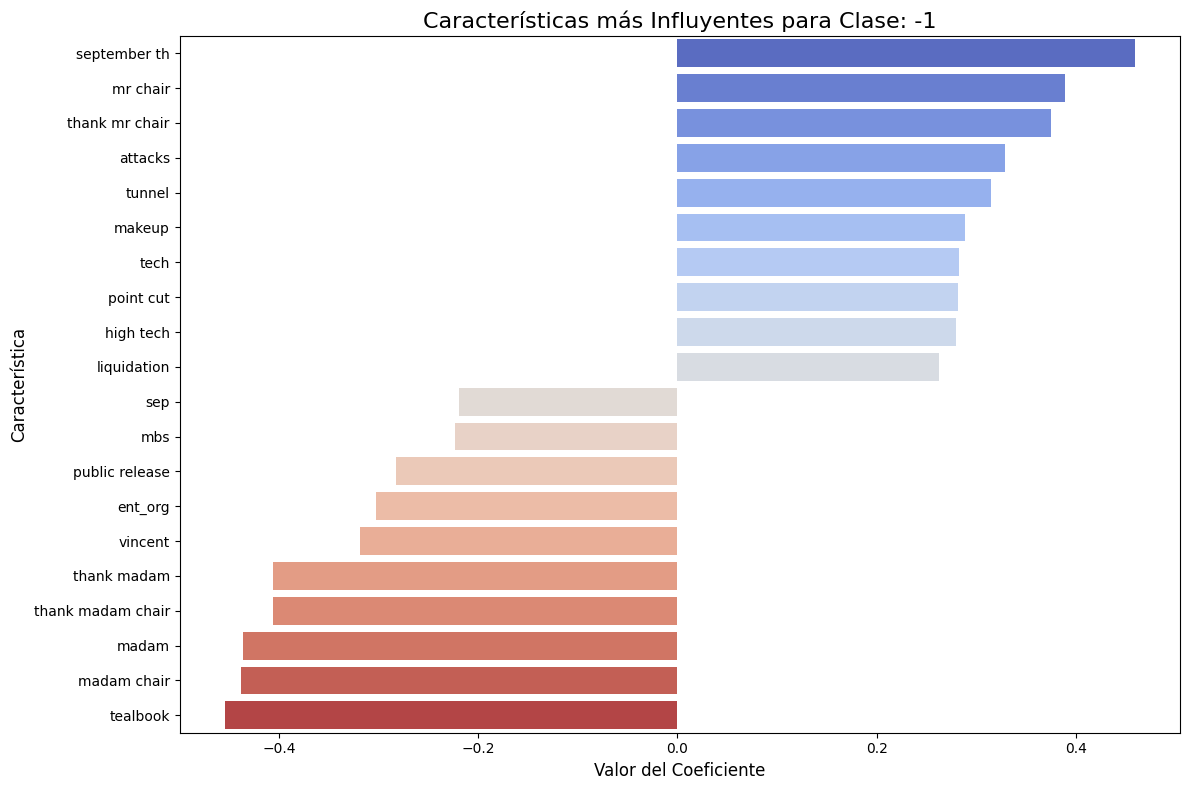

/tmp/ipython-input-3286218907.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=top_features_df, palette='coolwarm')


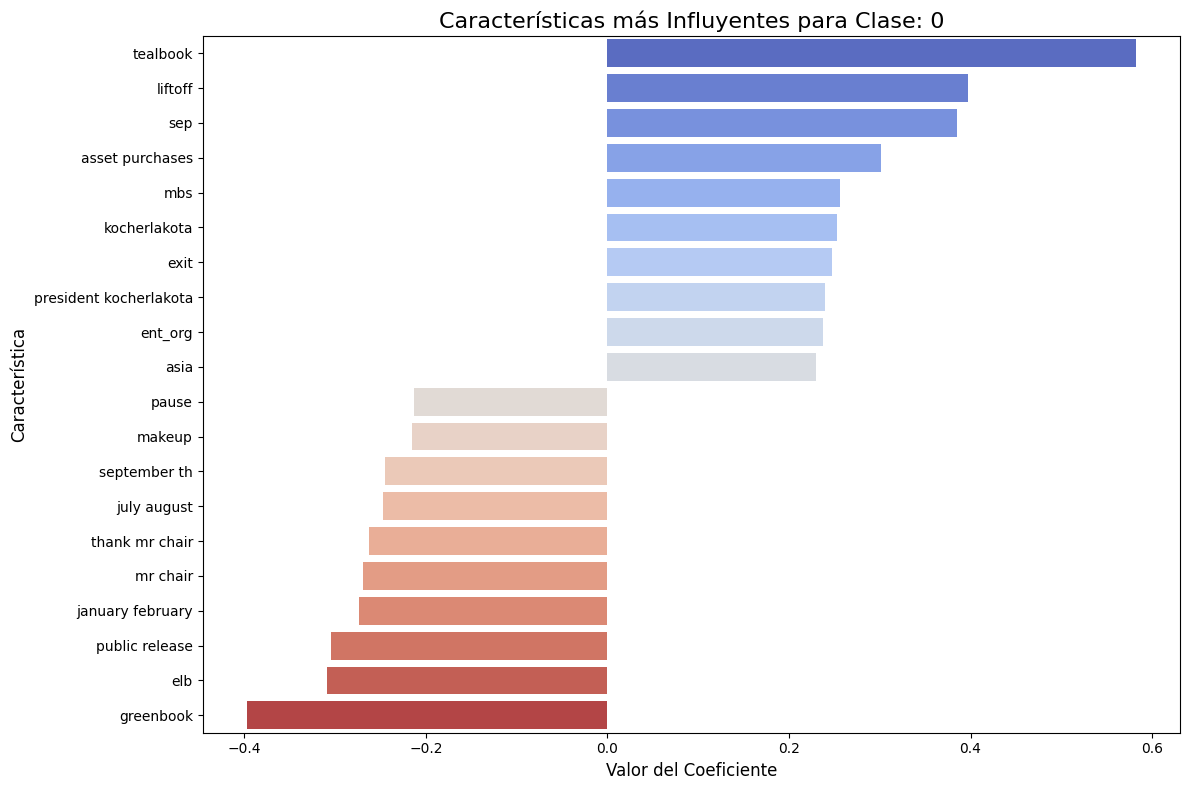

/tmp/ipython-input-3286218907.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='feature', data=top_features_df, palette='coolwarm')


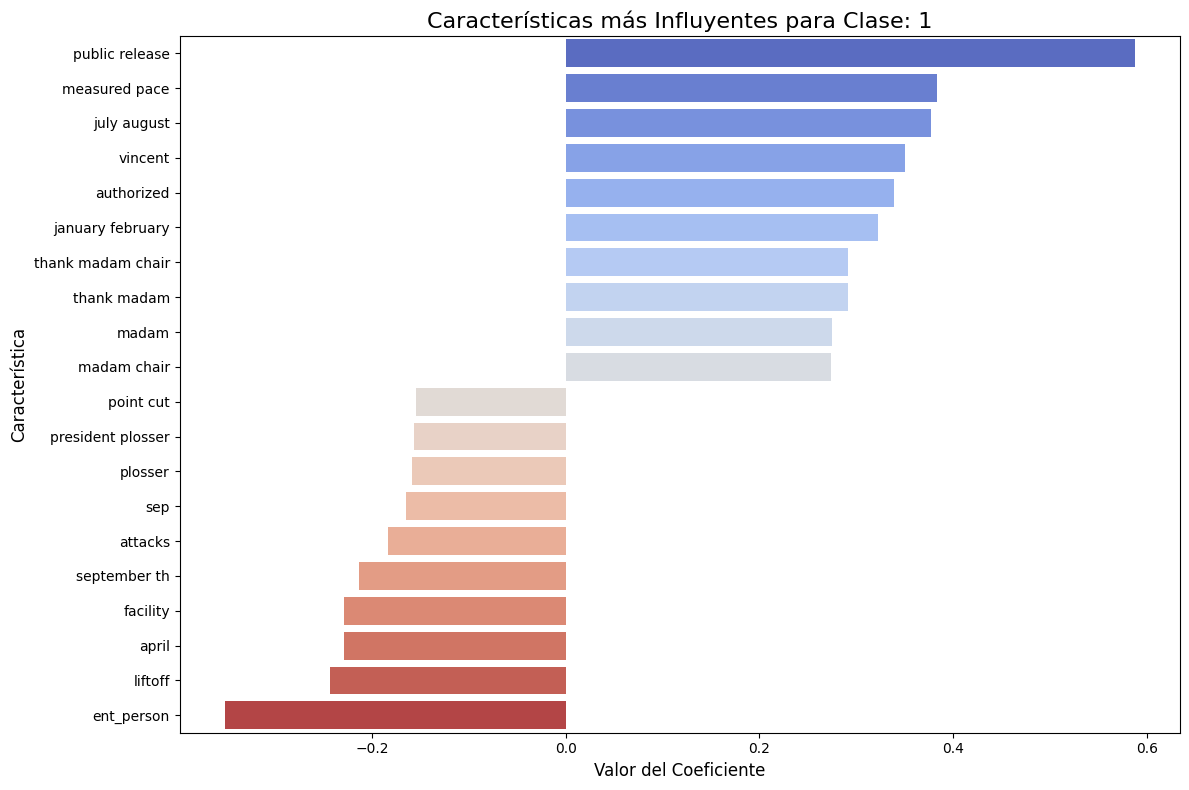

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_features(class_idx, top_n=10):
    coef_vec = clf.coef_[class_idx]
    sorted_idx = np.argsort(coef_vec)

    top_pos_idx = sorted_idx[-top_n:]
    top_neg_idx = sorted_idx[:top_n]

    top_features_df = pd.DataFrame({
        'feature': [feature_names[i] for i in np.concatenate([top_pos_idx, top_neg_idx])],
        'coef': [coef_vec[i] for i in np.concatenate([top_pos_idx, top_neg_idx])]
    }).sort_values('coef', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='coef', y='feature', data=top_features_df, palette='coolwarm')
    plt.title(f'Características más Influyentes para Clase: {classes[class_idx]}', fontsize=16)
    plt.xlabel('Valor del Coeficiente', fontsize=12)
    plt.ylabel('Característica', fontsize=12)
    plt.tight_layout()
    plt.show()

print("\n📊 Visualización de la Importancia de Características por Clase")
for i in range(len(classes)):
    plot_top_features(i)

### **Conclusión General del Avance 3**

En este avance, se ha construido y evaluado un modelo de referencia (*baseline*) para el problema de clasificación de la dirección de las tasas de interés, cumpliendo con los objetivos de establecer medidas de calidad y proporcionar un marco para la evaluación de modelos futuros.

**Resumen de Hallazgos:**

1.  **Modelo Baseline (Regresión Logística):** Se eligió la Regresión Logística por su interpretabilidad, eficiencia y robustez como punto de partida. El modelo fue entrenado utilizando una combinación de características textuales (TF-IDF) y numéricas extraídas de las transcripciones.

2.  **Métrica de Negocio (F1-Score Ponderado):** Se determinó que el **F1-Score Ponderado (0.72)** es la métrica más adecuada debido al desbalance de clases en el objetivo. Esta métrica ofrece una evaluación más fiable del rendimiento del modelo que el *accuracy*.

3.  **Viabilidad del Problema:** El desempeño del modelo baseline (`F1-Score: 0.72`) supera significativamente al de modelos nulos que predicen la clase más frecuente (`0.54`) o de forma aleatoria (`0.49`). Esto **confirma la viabilidad del problema**: los datos contienen información suficiente para predecir la variable objetivo con un rendimiento considerablemente mejor que el azar, estableciendo una solución mínima aceptable.

4.  **Características Relevantes:** El análisis de los coeficientes del modelo (método embebido) reveló los términos y variables más influyentes. Se observó que palabras como `"septiembre"`, `"crisis"` y `"recuperación"` tienen un impacto significativo, al igual que variables numéricas como la cantidad de tokens (`num_tokens`) y el conteo de entidades. Esta interpretabilidad es uno de los mayores valores del modelo baseline.

5.  **Diagnóstico del Modelo (Sobreajuste):** El análisis de las curvas de aprendizaje y la diferencia entre el *accuracy* de entrenamiento (`97%`) y de prueba (`72%`) demostraron claramente que el modelo presenta **sobreajuste**. Ha aprendido muy bien los patrones específicos de los datos de entrenamiento, pero le cuesta generalizar a datos nuevos.

**Marco de Referencia y Próximos Pasos:**

Este modelo baseline ha sentado las bases para el desarrollo de soluciones más avanzadas. Los próximos pasos se centrarán en dos áreas principales:

* **Mitigación del Sobreajuste:** Se explorarán técnicas como un ajuste más fino de la regularización (parámetro `C`), selección de características más robusta (para reducir el ruido de la matriz TF-IDF) o técnicas de reducción de dimensionalidad como PCA o SVD.
* **Modelos Más Avanzados:** Con el baseline como referencia, se evaluarán modelos más complejos como `XGBoost`, `LightGBM` o redes neuronales (tipo `LSTM` o `Transformers`) que podrían capturar relaciones no lineales en los datos y potencialmente ofrecer un mejor rendimiento de generalización. Cualquier modelo futuro deberá superar el F1-Score de `0.72` para ser considerado una mejora sustancial.

En definitiva, este avance no solo entrega un modelo funcional, sino un diagnóstico completo que define claramente el camino a seguir para la mejora continua del proyecto.